# Name : Sunita Samantasinghar
### Post Graduate Program in Artificial Intelligence and Machine Learning
2022-2023

# Recommendation Systems
### • CONTEXT: 
India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India 
in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system based on individual consumer’s behaviour or choice.

#### IMPORT ALL THE REQUIRED PACKAGES

In [65]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.express as px
from collections import defaultdict
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

#### Q1 A - Merge all the provided CSVs into one data-frame.

In [23]:
review_1 = pd.read_csv(r'C:\Users\Datta\Downloads\Data Set\phone_user_review_file_1.csv', encoding='iso-8859-1')
review_1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [24]:
review_2 = pd.read_csv(r'C:\Users\Datta\Downloads\Data Set\phone_user_review_file_2.csv', encoding='iso-8859-1')
review_2.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [25]:
review_3 = pd.read_csv(r'C:\Users\Datta\Downloads\Data Set\phone_user_review_file_3.csv', encoding='iso-8859-1')
review_3.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versÃµes me...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."


In [26]:
review_4 = pd.read_csv(r'C:\Users\Datta\Downloads\Data Set\phone_user_review_file_4.csv', encoding='iso-8859-1')
review_4.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [27]:
review_5 = pd.read_csv(r'C:\Users\Datta\Downloads\Data Set\phone_user_review_file_5.csv', encoding='iso-8859-1')
review_5.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black


In [28]:
review_6 = pd.read_csv(r'C:\Users\Datta\Downloads\Data Set\phone_user_review_file_6.csv', encoding='iso-8859-1')
review_6.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct


In [29]:
#Merge the data into a single dataframe 
reviews = pd.concat([review_1,review_2,review_3,review_4,review_5,review_6], ignore_index=True)

In [30]:
reviews.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


#### Q1 B - Explore, understand the Data and share at least 2 observations.

In [31]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415133 entries, 0 to 1415132
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 118.8+ MB


In [32]:
reviews.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [33]:
print(f'reviews: Rows: {reviews.shape[0]} and Columns: {reviews.shape[1]}\n')

reviews: Rows: 1415133 and Columns: 11



**Observations :**
- score and score_max are of float type and all other features are of object type.
- score, score_max, extract and author columns have Null values.
- date column should be datetype.

#### Q1 C - Round off scores to the nearest integers.

In [34]:
print('Number of unique values in each feature: \n',reviews.nunique())

Number of unique values in each feature: 
 phone_url       5556
date            7728
lang              22
country           42
source           331
domain           384
score             86
score_max          1
extract      1321353
author        801103
product        61313
dtype: int64


In [36]:
reviews[reviews['lang']!='en']['author'].value_counts(ascending=False)[:10]

Cliente Amazon        19276
e-bit                  8663
Client d'Amazon        7613
Amazon Kunde           4735
Amazon Customer        2713
einer Kundin           2610
einem Kunden           1898
unknown                1718
ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ     1070
Ð¡ÐµÑÐ³ÐµÐ¹            904
Name: author, dtype: int64

In [37]:
reviews[reviews['lang']!='en']['product'].value_counts(ascending=False)[:5]

Huawei P8lite zwart / 16 GB        2707
Samsung Galaxy Express I8730       2686
Samsung Galaxy S6 zwart / 32 GB    2345
Nokia 5800 XpressMusic             1996
Nokia N95                          1848
Name: product, dtype: int64

In [38]:
reviews['phone_url'].value_counts(ascending=False).head(10)

/cellphones/samsung-galaxy-s-iii/         17093
/cellphones/apple-iphone-5s/              16379
/cellphones/samsung-galaxy-s6/            16145
/cellphones/samsung-galaxy-s5/            16082
/cellphones/samsung-galaxy-s7-edge/       15917
/cellphones/motorola-moto-g/              14476
/cellphones/samsung-galaxy-s7-789999/     13488
/cellphones/samsung-i9500-galaxy-s-iv/    13161
/cellphones/huawei-p8-lite/               12629
/cellphones/lenovo-vibe-k4-note/           9662
Name: phone_url, dtype: int64

In [39]:
reviews[reviews["phone_url"]=='/cellphones/samsung-galaxy-s6/'][['product']].value_counts().head(10)

product                                                                                                                             
Samsung Galaxy S6 zwart / 32 GB                                                                                                         2345
Samsung Galaxy S6 32GB (AT&T)                                                                                                            979
Samsung Galaxy S6 32GB (Sprint)                                                                                                          935
Samsung Galaxy S6 32GB (Verizon)                                                                                                         919
Samsung Galaxy S6 wit / 32 GB                                                                                                            801
Samsung Galaxy S6 32GB (T-Mobile)                                                                                                        736
Samsung Galaxy S6    

In [40]:
reviews['phone'] = reviews['phone_url'].str.split("/").apply(lambda col: col[2]).replace('-', ' ', regex=True)
reviews['product'] = reviews['phone']
reviews['phone'].unique()

array(['samsung galaxy s8', 'samsung galaxy s6 edgeplus',
       'samsung galaxy s8 plus', ..., 'siemens c10', 'maxon mx 3204',
       'alcatel ot club_1187'], dtype=object)

In [41]:
reviews['product'].shape

(1415133,)

In [42]:
product = reviews['product'].value_counts()[:10]
print('Distribution of number of ratings per item (Clipped at 10): \n',product)

Distribution of number of ratings per item (Clipped at 10): 
 samsung galaxy s iii         17093
apple iphone 5s              16379
samsung galaxy s6            16145
samsung galaxy s5            16082
samsung galaxy s7 edge       15917
motorola moto g              14476
samsung galaxy s7 789999     13488
samsung i9500 galaxy s iv    13161
huawei p8 lite               12629
lenovo vibe k4 note           9662
Name: product, dtype: int64


In [43]:
users = reviews['author'].value_counts(dropna=False)[:10]
print('Distribution of number of ratings per user(Clipped at 10): \n',users)

Distribution of number of ratings per user(Clipped at 10): 
 Amazon Customer    76978
NaN                63202
Cliente Amazon     19304
e-bit               8663
Client d'Amazon     7716
Amazon Kunde        4750
Anonymous           2750
einer Kundin        2610
einem Kunden        1898
unknown             1738
Name: author, dtype: int64


In [44]:
print('Uniqe values in the "score" feature: \n',reviews.score.unique())

Uniqe values in the "score" feature: 
 [10.   6.   9.2  4.   8.   2.   9.6  7.2  6.8  9.   8.3  8.8  8.4  5.3
  7.   6.4  7.6  nan  5.2  3.2  4.4  2.8  5.6  3.6  4.8  1.   5.   3.
  2.4  9.3  8.5  9.5  6.5  5.5  9.8  8.2  8.6  7.8  9.4  6.6  6.2  7.5
  9.9  2.7  8.7  6.7  3.3  7.7  7.3  9.7  6.3  7.4  5.7  4.7  4.3  5.8
  4.2  4.5  2.2  5.4  7.9  3.5  4.6  3.7  2.5  3.4  7.1  8.1  1.2  1.4
  3.8  9.1  2.6  1.6  1.7  1.5  1.8  2.3  6.1  5.9  1.3  0.2  0.4  8.9
  6.9  0.6  4.9]


In [47]:
relevant_features=['author','product','score']

In [45]:
reviews_1 = reviews.copy()

In [48]:
reviews_1 = reviews_1.loc[:,relevant_features]
print(f'reviews_1 Shape after removing irrelevant features: Rows: {reviews_1.shape[0]} and Columns: {reviews_1.shape[1]}\n')

reviews_1 Shape after removing irrelevant features: Rows: 1415133 and Columns: 3



In [49]:
reviews_1['score'] = reviews_1['score'].round(0).astype('Int64')
print('Round-off Unique values in the "score" feature(after rounding-off): \n',list(reviews_1.score.unique()))

Round-off Unique values in the "score" feature(after rounding-off): 
 [10, 6, 9, 4, 8, 2, 7, 5, <NA>, 3, 1, 0]


#### Q1 D - Check for missing values. Impute the missing values, if any.

In [53]:
reviews_1['score'] = reviews_1['score'].fillna(reviews_1['score'].median())

In [54]:
reviews_1.dropna(inplace=True)
reviews_1 = reviews_1[reviews_1["author"] != 'Anonymous']
print(f'reviews_1 : Rows: {reviews_1.shape[0]} and Columns: {reviews_1.shape[1]}\n')

reviews_1 : Rows: 1349181 and Columns: 3



In [55]:
reviews_1 = reviews_1.drop_duplicates()
print(f'After removing duplicates): Rows: {reviews_1.shape[0]} and Columns: {reviews_1.shape[1]}\n')

After removing duplicates): Rows: 1154651 and Columns: 3



In [56]:
reviews_1.head()

,author,product,score
0,CarolAnn35,samsung galaxy s8,10
1,james0923,samsung galaxy s8,10
2,R. Craig,samsung galaxy s8,6
3,Buster2020,samsung galaxy s8,9
4,S Ate Mine,samsung galaxy s8,4


In [57]:
reviews_1['product'].value_counts().head()

samsung galaxy s5         13205
samsung galaxy s6         12775
motorola moto g           11991
samsung galaxy s7 edge    11957
apple iphone 5s           11853
Name: product, dtype: int64

#### Q1 E - Check for duplicate values and remove them, if any.

In [58]:
reviews_1 = reviews_1.drop_duplicates()
reviews_1.head()

,author,product,score
0,CarolAnn35,samsung galaxy s8,10
1,james0923,samsung galaxy s8,10
2,R. Craig,samsung galaxy s8,6
3,Buster2020,samsung galaxy s8,9
4,S Ate Mine,samsung galaxy s8,4


#### Q1 F - Keep only 1 Million data samples. Use random state=612.

In [72]:
reviews_1M = reviews_1.sample(n=1000000)
reviews_1M.head()

,author,product,score
246060,Client d'Amazon,oukitel k10000,10
92208,Ekat1997,samsung galaxy a5 2017,10
1114590,Michael Bartels,doro phoneeasy 338,6
47342,Tommaso,huawei honor 7,10
466206,Chiara Mancinelli,samsung galaxy s5 mini,10


In [73]:
reviews_1M.shape

(1000000, 3)

In [74]:
reviews_1M['product'].value_counts().head()

samsung galaxy s5         11419
samsung galaxy s6         11146
samsung galaxy s7 edge    10332
motorola moto g           10330
apple iphone 5s           10218
Name: product, dtype: int64

#### Q1 G - Drop irrelevant features. Keep features like Author, Product, and Score.

In [76]:
relevant_features=['author','product','score']

In [79]:
author = reviews_1M['product'].value_counts()[:10]
product = reviews_1M['product'].value_counts()[:10]
score = reviews_1M['score'].value_counts()[:10]

In [78]:
author

samsung galaxy s5            11419
samsung galaxy s6            11146
samsung galaxy s7 edge       10332
motorola moto g              10330
apple iphone 5s              10218
samsung i9500 galaxy s iv     9714
samsung galaxy s7 789999      9301
huawei p8 lite                6579
apple iphone 4s               6447
samsung galaxy s iii          6287
Name: product, dtype: int64

Distribution of number of ratings per item (Clipped at 10): 
 samsung galaxy s5            11419
samsung galaxy s6            11146
samsung galaxy s7 edge       10332
motorola moto g              10330
apple iphone 5s              10218
samsung i9500 galaxy s iv     9714
samsung galaxy s7 789999      9301
huawei p8 lite                6579
apple iphone 4s               6447
samsung galaxy s iii          6287
Name: product, dtype: int64


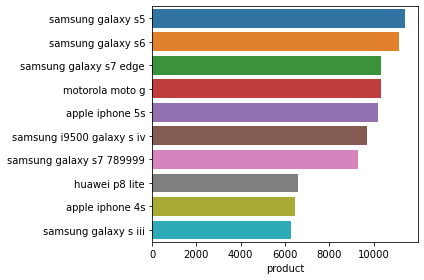

In [80]:
print('Distribution of number of ratings per item (Clipped at 10): \n',product)
sns.barplot(y=product.index,x=product)
plt.tight_layout()
plt.show()

Distribution of number of ratings per user(Clipped at 10): 
 Amazon Customer    76978
NaN                63202
Cliente Amazon     19304
e-bit               8663
Client d'Amazon     7716
Amazon Kunde        4750
Anonymous           2750
einer Kundin        2610
einem Kunden        1898
unknown             1738
Name: author, dtype: int64


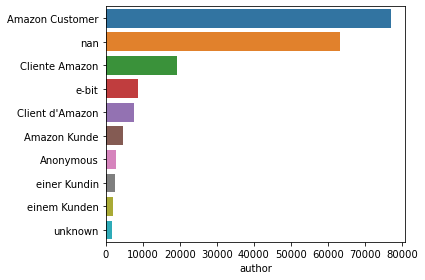

In [81]:
print('Distribution of number of ratings per user(Clipped at 10): \n',users)
users.index = users.index.map(str)
sns.barplot(y=users.index,x=users)
plt.tight_layout()
plt.show()

Distribution of number of ratings per user(Clipped at 10): 
 Amazon Customer    4868
Cliente Amazon     1685
Amazon Kunde       1165
Client d'Amazon     984
David               553
Alex                540
Daniel              492
Chris               468
Marco               449
Andrea              440
Name: author, dtype: int64


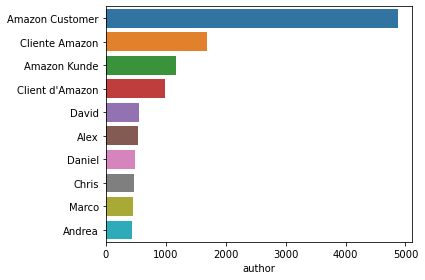

In [83]:
users = reviews_1M['author'].value_counts(dropna=False)[:10]
print('Distribution of number of ratings per user(Clipped at 10): \n',users)
users.index = users.index.map(str)
sns.barplot(y=users.index,x=users)
plt.tight_layout()
plt.show()

In [85]:
reviews_1M_new = reviews_1M.copy()

In [86]:
reviews_1M_new = reviews_1M_new.loc[:,relevant_features]
print(f'After removing irrelevant features: Rows: {reviews_1M_new.shape[0]} and Columns: {reviews_1M_new.shape[1]}\n')

After removing irrelevant features: Rows: 1000000 and Columns: 3



In [89]:
reviews_1M_new = reviews_1M_new.drop_duplicates()
print(f'After removing duplicates: Rows: {reviews_1M_new.shape[0]} and Columns: {reviews_1M_new.shape[1]}\n')

After removing duplicates: Rows: 1000000 and Columns: 3



In [88]:
reviews_1M_new.dropna(inplace=True)
reviews_1M_new = reviews_1M_new[reviews_1M_new["author"] != 'Anonymous']
print(f'After removing missing values): Rows: {reviews_1M_new.shape[0]} and Columns: {reviews_1M_new.shape[1]}\n')

After removing missing values): Rows: 1000000 and Columns: 3



In [90]:
reviews_1M_new.head()

,author,product,score
246060,Client d'Amazon,oukitel k10000,10
92208,Ekat1997,samsung galaxy a5 2017,10
1114590,Michael Bartels,doro phoneeasy 338,6
47342,Tommaso,huawei honor 7,10
466206,Chiara Mancinelli,samsung galaxy s5 mini,10


#### Q2 A - Identify the most rated features.

In [93]:
print('Most rated features/products are: \n')
reviews_1M_new['product'].value_counts().head()

Most rated features/products are: 



samsung galaxy s5         11419
samsung galaxy s6         11146
samsung galaxy s7 edge    10332
motorola moto g           10330
apple iphone 5s           10218
Name: product, dtype: int64

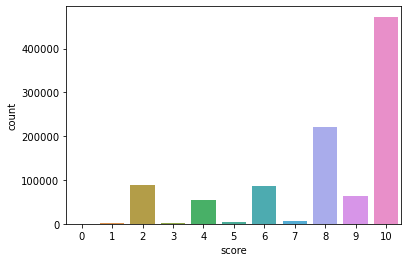

In [94]:
sns.countplot(data=reviews_1M_new , x='score')
plt.show()

In [95]:
reviews_1[reviews_1['score']==10]['author'].value_counts().head(10)

Amazon Customer    1339
Cliente Amazon      444
Amazon Kunde        368
Client d'Amazon     257
David               246
Alex                242
Daniel              231
Marco               206
Chris               191
Amazon-Kunde        179
Name: author, dtype: int64

#### Q2 B - Identify the users with most number of reviews.

In [99]:
print('User with highest number of reviews: \n')
reviews_1M_new['author'].value_counts().head()

User with highest number of reviews: 



Amazon Customer    4868
Cliente Amazon     1685
Amazon Kunde       1165
Client d'Amazon     984
David               553
Name: author, dtype: int64

In [105]:
print('Products with highest number of reviews: \n')
reviews_1M_new['product'].value_counts().head()

Products with highest number of reviews: 



samsung galaxy s5         11419
samsung galaxy s6         11146
samsung galaxy s7 edge    10332
motorola moto g           10330
apple iphone 5s           10218
Name: product, dtype: int64

In [107]:
print('Highest scores: \n')
reviews_1M_new['score'].value_counts().head()

Highest scores: 



10    472773
8     221249
2      88091
6      86802
9      63540
Name: score, dtype: Int64

#### Q2 C - Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset.

In [134]:
user50 = reviews_1M_new['author'].value_counts()
user50 = user50[user50>50].index.tolist() # list of authors with > 50 ratings
print('Number of user who have given more than 50 rating: ', len(user50))

Number of user who have given more than 50 rating:  687


In [135]:
product50 = reviews_1M_new['product'].value_counts()
product50 = product50[product50>50].index.tolist() # list of products with > 50 ratings
print('Number of products having more than 50 rating: ', len(product50))

Number of products having more than 50 rating:  2338


In [136]:
reviews_1M_final_dataset = reviews_1M_new[(reviews_1M_new['author'].isin(user50)) & (reviews_1M_new['product'].isin(product50))]
print(f'\nreviews_1M_final_dataset: Rows: {reviews_1M_final_dataset.shape[0]} and Columns: {reviews_1M_final_dataset.shape[1]}\n')


reviews_1M_final_dataset: Rows: 77373 and Columns: 3



In [137]:
del user50, product50
reviews_1M_final_dataset.head()

,author,product,score
246060,Client d'Amazon,oukitel k10000,10
693580,Alberto,samsung i9500 galaxy s iv,10
265888,diego,apple iphone 6,10
1015793,Chris,htc desire,4
595841,Amazon Customer,ttfone venus 2,6


In [138]:
reviews_1M_final_dataset['author'].unique()[:100]

array(["Client d'Amazon", 'Alberto', 'diego', 'Chris', 'Amazon Customer',
       'Lucas', 'Ray', 'Jason', 'anonieme bezoeker', 'Mark', 'Ed', 'Raj',
       'Carlos', 'Ð\x9dÐ¸ÐºÐ¾Ð»Ð°Ð¹', 'streghe_1965', 'Martin',
       'gumusoje', 'William', 'JÃ¼rgen', 'zehrabalta', 'Steve',
       'Ð\x9dÐ°Ñ\x82Ð°Ð»Ñ\x8cÑ\x8f', 'Paul', 'bedduamiz', 'Federico',
       'pikacu', 'Ð\x9eÐ»Ñ\x8cÐ³Ð°', 'Peter', 'ZÃ¡kaznÃ\xadk', 'ozer1299',
       'Kim', 'Fabio', 'tony', 'Ð\x90Ð½Ñ\x82Ð¾Ð½', 'Kevin', 'francesco',
       'Erik', 'Ð\x92Ð»Ð°Ð´Ð¸Ñ\x81Ð»Ð°Ð²', 'Alex', 'G', 'Javi', 'patrick',
       'MS', 'Cliente Amazon', 'ali', 'Christopher', 'Jonathan', 'mike',
       'Maria', 'patricia', 'Sandy', 'Amazon-Kunde', 'bumudur', 'Alfredo',
       'Ð\x90Ð½Ð´Ñ\x80ÐµÐ¹', 'Hans', 'zeynep34', 'Phil', 'enrico',
       'Pen Name', 'anneme', 'Ram', 'Christian', 'Roman', 'Andres',
       'Alessandra', 'e-bit', 'Roberto', 'pedro', 'Melissa', 'Christophe',
       'Ð\x90Ð½Ð°Ñ\x81Ñ\x82Ð°Ñ\x81Ð¸Ñ\x8f', 'Rahul', 'fabio', 'Gast',
   

In [139]:
reviews_1M_final_dataset['product'].unique()[:100]

array(['oukitel k10000', 'samsung i9500 galaxy s iv', 'apple iphone 6',
       'htc desire', 'ttfone venus 2', 'samsung galaxy s duos s7562',
       'samsung galaxy j3 duos', 'samsung gt e1200', 'alcatel ot 918d',
       'asus zenfone 3', 'sony xperia c4', 'nokia 3230',
       'microsoft lumia 640 dual sim', 'nokia x2 02', 'samsung b5722',
       'samsung e1050', 'samsung galaxy fit', 'apple iphone 6s plus',
       'apple iphone 3gs', 'samsung sgh j700', 'doogee x5 max pro',
       'lenovo ideaphone a706', 'apple iphone 7', 'motorola rokr e8',
       'motorola droid x', 'apple iphone 4s', 'sony k790i',
       'htc wildfire s', 'samsung galaxy s6 edgeplus',
       'asus zenfone go zc500tg', 'motorola droid razr maxx',
       'samsung galaxy s5', 'alcatel onetouch pop 3 5015d',
       'sony xperia zr', 'motorola rokr z6m', 'lg g3 d855 657484',
       'samsung galaxy s6', 'huawei ascend mate', 'asus zenfone 4',
       'sony xperia z2', 'nokia 100', 'lg optimus l9 ii',
       'motorola atr

In [140]:
reviews_1M_final_dataset.shape

(77373, 3)

In [141]:
reviews_1M_final_dataset.head()

,author,product,score
246060,Client d'Amazon,oukitel k10000,10
693580,Alberto,samsung i9500 galaxy s iv,10
265888,diego,apple iphone 6,10
1015793,Chris,htc desire,4
595841,Amazon Customer,ttfone venus 2,6


#### Q3 - Build a popularity based model and recommend top 5 mobile phones.

In [142]:
def popularity_rec(data):
    ratings_mean_count = pd.DataFrame(data.groupby('product')['score'].mean())
    ratings_mean_count['rating_counts'] = data.groupby('product')['score'].count()
    ratings_mean_count = ratings_mean_count.sort_values(by=['score','rating_counts'], ascending=[False,False])
    print('Top 5 recommendations for the products are: \n')
    display(ratings_mean_count.head())
    return

In [144]:
popularity_rec(reviews_1M_final_dataset)

Top 5 recommendations for the products are: 



,score,rating_counts
product,,
htc gratia,10.0,4
samsung e1120,10.0,4
lg p930,10.0,3
samsung sgh s500,10.0,3
karbonn titanium x,10.0,2


In [145]:
field_length = reviews_1M_final_dataset.author.astype(str).map(len)
print (reviews_1M_final_dataset.iloc[field_length.argmax(),0])

ÐÐ¾Ð»ÑÐ·Ð¾Ð²Ð°ÑÐµÐ»Ñ ÑÐºÑÑÐ» ÑÐ²Ð¾Ð¸ Ð´Ð°Ð½Ð½ÑÐµ


#### Q4 - Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch.

In [147]:
revs50_ = Dataset.load_from_df(reviews_1M_final_dataset[['author','product','score']], Reader(rating_scale=(1, 10)))
trainset, testset = train_test_split(revs50_, test_size=.25)

**Top 3 values from data set :**

In [148]:
for key,value in {k: v for k, v in trainset.ur.items() if k <= 2}.items(): print(key,'-> ',value,'\n')
print('\n', *testset[0:3], sep='\n\n')

0 ->  [(0, 9.0), (88, 2.0), (403, 8.0), (818, 2.0), (305, 8.0), (73, 8.0), (194, 6.0), (856, 10.0), (29, 2.0), (39, 9.0), (692, 6.0), (88, 10.0), (413, 10.0), (160, 9.0), (29, 10.0), (1411, 8.0), (1512, 10.0), (594, 2.0), (34, 8.0), (218, 2.0), (276, 10.0), (134, 10.0), (240, 8.0), (1467, 10.0), (50, 7.0), (1672, 8.0), (575, 10.0), (73, 2.0), (1081, 10.0), (729, 8.0), (191, 4.0), (283, 10.0), (1654, 8.0), (1444, 2.0), (877, 6.0), (603, 2.0), (465, 8.0), (26, 6.0), (1158, 10.0), (761, 8.0), (212, 9.0), (388, 8.0), (131, 10.0), (51, 6.0), (267, 8.0), (389, 10.0), (1689, 10.0), (864, 2.0), (1967, 8.0), (1594, 10.0), (393, 10.0), (181, 9.0), (1055, 10.0), (192, 10.0), (194, 2.0), (194, 4.0), (462, 10.0), (294, 10.0), (166, 6.0), (64, 4.0), (207, 2.0), (136, 10.0), (209, 4.0), (581, 10.0), (163, 8.0), (814, 6.0), (1704, 10.0), (125, 10.0), (1132, 10.0), (1788, 10.0), (1114, 4.0), (300, 10.0), (200, 10.0), (580, 10.0), (170, 8.0), (50, 8.0), (163, 2.0), (8, 6.0), (522, 8.0), (1347, 6.0), (41

In [152]:
# Objective: To get top_n recommendation for each user
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the n highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [157]:
%%time
# fit and predict using svd
def svd_func(train, test):
    svd = SVD()
    svd.fit(train)
    svd_pred = svd.test(test)
    return svd_pred, svd

svd_pred, svd = svd_func(trainset,testset)
print('First few prediction values: \n',svd_pred[0:2])
svd_rmse = round(accuracy.rmse(svd_pred),2)

First few prediction values: 
 [Prediction(uid='Richard', iid='alcatel gophone 510a', r_ui=2.0, est=8.226149307743116, details={'was_impossible': False}), Prediction(uid='Vincenzo', iid='nokia c2 01', r_ui=10.0, est=8.71030292444284, details={'was_impossible': False})]
RMSE: 2.9287
CPU times: total: 1.66 s
Wall time: 1.75 s


- Collaborative Filtering model using kNNWithMeans_Item based :

In [159]:
%%time
# fit and predict using knn
def knn_item(train, test):
    knn_i = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
    knn_i.fit(train)
    knn_i_pred = knn_i.test(test)
    return knn_i_pred, knn_i

knn_i_pred, knn_i = knn_item(trainset, testset)
print('First few prediction values: \n',knn_i_pred[0:2])
knn_i_rmse = round(accuracy.rmse(knn_i_pred),2)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
First few prediction values: 
 [Prediction(uid='Richard', iid='alcatel gophone 510a', r_ui=2.0, est=7.6855851529609716, details={'actual_k': 38, 'was_impossible': False}), Prediction(uid='Vincenzo', iid='nokia c2 01', r_ui=10.0, est=8.797244401798583, details={'actual_k': 36, 'was_impossible': False})]
RMSE: 2.8563
CPU times: total: 16.2 s
Wall time: 16.9 s


- Collaborative Filtering model using kNNWithMeans_User based :

In [161]:
%%time
# fit and predict using knn
def knn_user(train, test):
    knn_u = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
    knn_u.fit(train)
    knn_u_pred = knn_u.test(test)
    return knn_u_pred, knn_u

knn_u_pred, knn_u = knn_user(trainset, testset)
print('First few prediction values: \n',knn_u_pred[0:2])
knn_u_rmse = round(accuracy.rmse(knn_u_pred),2)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
First few prediction values: 
 [Prediction(uid='Richard', iid='alcatel gophone 510a', r_ui=2.0, est=7.889830508474576, details={'actual_k': 0, 'was_impossible': False}), Prediction(uid='Vincenzo', iid='nokia c2 01', r_ui=10.0, est=9.12426958526799, details={'actual_k': 50, 'was_impossible': False})]
RMSE: 2.9028
CPU times: total: 6.22 s
Wall time: 6.7 s


#### Q5 - Evaluate the collaborative model. Print RMSE value.

In [158]:
print('\nRMSE value(test-set): ',round(accuracy.rmse(svd_pred),2),'\n')

RMSE: 2.9287

RMSE value(test-set):  2.93 



In [160]:
print('\nRMSE value(Item-based Model, test-set): ',round(accuracy.rmse(knn_i_pred),2),'\n')

RMSE: 2.8563

RMSE value(Item-based Model, test-set):  2.86 



In [162]:
print('\nRMSE value(User-based Model, test-set): ',round(accuracy.rmse(knn_u_pred),2),'\n')

RMSE: 2.9028

RMSE value(User-based Model, test-set):  2.9 



<AxesSubplot:>

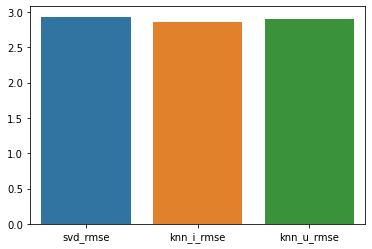

In [163]:
sns.barplot(x=['svd_rmse','knn_i_rmse', 'knn_u_rmse'],y=[svd_rmse,knn_i_rmse, knn_u_rmse])

#### Q6 - Predict score (average rating) for test users.

**SVD :**

In [168]:
svd_pred_df=pd.DataFrame(svd_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
avg_pred_test_user = svd_pred_df['est'].mean()
print('average prediction for test users: ',avg_pred_test_user)

average prediction for test users:  7.786028758517933


In [169]:
avg_rating_test_user = svd_pred_df['rui'].mean()
print('average ratings for test users: ',avg_rating_test_user)

average ratings for test users:  7.85990488006617


In [177]:
avg_pred_error_test_user = (svd_pred_df['rui']-svd_pred_df['est']).abs().mean()
print('average prediction error for test users: ',avg_pred_error_test_user)

average prediction error for test users:  2.2767379409365307


**KNN Itm Prediction :**

In [ ]:
knn_item_pred_df=pd.DataFrame(knn_i_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])

In [173]:
knn_item_pred_test_user = knn_item_pred_df['est'].mean()
print('average prediction for test users: ',knn_item_pred_test_user)

average prediction for test users:  7.743952581618266


In [174]:
knn_item_rating_test_user = knn_item_pred_df['rui'].mean()
print('average ratings for test users: ',knn_item_rating_test_user)

average ratings for test users:  7.85990488006617


In [178]:
knn_item_pred_error_test_user = (knn_item_pred_df['rui']-knn_item_pred_df['est']).abs().mean()
print('average prediction error for test users: ',knn_item_pred_error_test_user)

average prediction error for test users:  2.2466862533886847


**KNN User Prediction :**

In [179]:
knn_user_pred_df=pd.DataFrame(knn_u_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])

In [181]:
knn_user_pred_test_user = knn_user_pred_df['est'].mean()
print('Average prediction for test users: ',knn_user_pred_test_user)

Average prediction for test users:  7.767693589411553


In [182]:
knn_user_ratings_test_user = knn_user_pred_df['rui'].mean()
print('Average ratings for test users: ',knn_user_ratings_test_user)

Average ratings for test users:  7.85990488006617


In [183]:
knn_user_pred_error_test_user = (knn_user_pred_df['rui']-knn_user_pred_df['est']).abs().mean()
print('Average prediction error for test users: ',knn_user_pred_error_test_user)

Average prediction error for test users:  2.252720932338256


#### Q7 - Report your findings and inferences.

- Most popular phone , which rated 10 by highest number. 
    * htc gratia
    * samsung e1120
- Overall dataset is highly skewed towards 'Amazon Customers' from different countries.
- Most of the author / user have given rating 10 or 8.
- Both knn item based and knn user based are similar **RMSE**.

#### Q8 - Try and recommend top 5 products for test users.

In [184]:
#recommend top 5 products for test users
top_5 = get_top_n(knn_i_pred,5)
print('Top 5 recommendations for all test users are: \n')
for key,value in top_5.items(): print(key,'-> ',value,'\n')

Top 5 recommendations for all test users are: 

Richard ->  [('binatone speakeasy 210', 10), ('nokia mural 6750', 10), ('motorola moto g 4 plus', 9.94873512251663), ('apple iphone 6s', 9.444647324702737), ('nokia 108', 9.118311710582434)] 

Vincenzo ->  [('huawei ascend honor 3c', 10), ('lg optimus g', 10), ('microsoft lumia 532', 9.87723917582234), ('alcatel one touch idol 6030d', 9.865869063014875), ('motorola moto x', 9.790995937189907)] 

Maria ->  [('asus zenfone selfie zd551kl', 9.135631493421394), ('sony xperia z 504642', 9.057057511306963), ('samsung galaxy j5', 8.988098993767787), ('huawei p9 lite', 8.84022495302737), ('apple iphone 4s', 8.565726123551633)] 

ÐÐ³Ð¾ÑÑ ->  [('samsung galaxy j7 2016', 9.599806876525207), ('apple iphone se', 9.592664280362028), ('apple iphone se', 9.592664280362028), ('samsung galaxy note 2', 9.488363239349708), ('samsung galaxy note 5 sm n920f', 9.455654870599714)] 

Amazon Customer ->  [('siemens s45', 10), ('binatone speakeasy 210', 10), ('l

Raul ->  [('samsung gt e1200', 9.572514817555765), ('tp link archer t6e', 9.568633867873091), ('nokia 108', 8.791307924582837), ('blu star 4 5', 8.756465900950163), ('sony xperia z ultra', 8.612165231811906)] 

ÐÐ½Ð½Ð° ->  [('apple iphone 5s', 9.754795828611568), ('sony xperia z1 compact d5503', 9.46501210022576), ('nokia 3250', 9.272529632024522), ('huawei ascend g700', 8.927290977491918), ('lenovo a2010', 8.90337218706387)] 

Sabrina ->  [('apple iphone se', 9.603888561411303), ('samsung galaxy s3 mini', 9.423910700363246), ('google nexus 6', 9.133956730218374), ('microsoft lumia 640 dual sim', 8.928119077572886), ('nokia 6101', 8.89694583962409)] 

Josh ->  [('apple iphone 6s', 8.843558581997621), ('motorola moto z play', 8.546686554860893), ('samsung gt b2100', 8.39577096979463), ('apple iphone 5s', 8.240422019874472), ('samsung galaxy nexus', 8.149997687129508)] 

rick2809 ->  [('asus ze550kl', 10), ('lg optimus g e977', 10), ('microsoft lumia 532', 10), ('samsung galaxy core plu

In [185]:
print('Top 5 recommendations for 3 users are: \n')
for key,value in {k: v for k, v in top_5.items() if k in ['Amazon Customer','Cliente Amazon',"Client d'Amazon"]}.items(): print(key,'-> ',value,'\n')
    

Top 5 recommendations for 3 users are: 

Amazon Customer ->  [('siemens s45', 10), ('binatone speakeasy 210', 10), ('lg a290', 10), ('zte zmax 2', 10), ('zte zmax 2', 10)] 

Cliente Amazon ->  [('cubot s108', 9.927254782857753), ('htc one m8s', 9.73787555160847), ('nokia 6600', 9.613282368746226), ('alcatel one touch pop c1', 9.20833654195251), ('alcatel one touch pop c1', 9.20833654195251)] 

Client d'Amazon ->  [('meizu pro 6', 9.36574679479372), ('elephone s7', 9.06104867801285), ('lenovo k6 dual', 8.75177591965478), ('sony xperia x compact', 8.645549611775705), ('acer liquid jade z', 8.492640906110452)] 



#### Q9 - Try other techniques (Example: cross validation) to get better results.

In [186]:
svd_cv = cross_validate(svd,revs50_, measures=['RMSE'], cv=5, verbose=False)
print('\n Mean svd cv score:', round(svd_cv['test_rmse'].mean(),2),'\n')
svd_cv


 Mean svd cv score: 2.95 



{'test_rmse': array([2.94483386, 2.94499165, 2.94330636, 2.9300462 , 2.97567742]),
 'fit_time': (1.5308892726898193,
  1.540712594985962,
  1.4646525382995605,
  1.4569015502929688,
  1.471820592880249),
 'test_time': (0.2795546054840088,
  0.23705673217773438,
  0.22057175636291504,
  0.22004914283752441,
  0.2233891487121582)}

In [187]:
knn_item_cv = cross_validate(knn_i,revs50_, measures=['RMSE'], cv=5, verbose=False)
print('\n Mean knn_item_cv score:', round(knn_item_cv['test_rmse'].mean(),2),'\n')
knn_item_cv

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

 Mean knn_item_cv score: 2.87 



{'test_rmse': array([2.88626137, 2.85987119, 2.89376335, 2.86064737, 2.8649574 ]),
 'fit_time': (5.560530662536621,
  6.2097578048706055,
  6.467971324920654,
  5.990599155426025,
  6.092859745025635),
 'test_time': (9.791648626327515,
  13.926448583602905,
  9.650166988372803,
  9.27071762084961,
  9.31303095817566)}

In [188]:
knn_user_cv = cross_validate(knn_i,revs50_, measures=['RMSE'], cv=5, verbose=False)
print('\n Mean knn_user_cv score:', round(knn_user_cv['test_rmse'].mean(),2),'\n')
knn_user_cv

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

 Mean knn_user_cv score: 2.87 



{'test_rmse': array([2.88831676, 2.84237124, 2.86459649, 2.86010235, 2.88865559]),
 'fit_time': (5.99578595161438,
  6.0402305126190186,
  7.092443466186523,
  5.973947763442993,
  5.912307262420654),
 'test_time': (9.342657804489136,
  9.110684871673584,
  9.261911392211914,
  9.301969766616821,
  9.55881142616272)}

<AxesSubplot:>

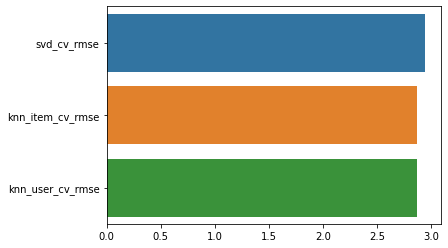

In [190]:
sns.barplot(y=['svd_cv_rmse','knn_item_cv_rmse', 'knn_user_cv_rmse'],
            x=[svd_cv['test_rmse'].mean(),knn_item_cv['test_rmse'].mean(), knn_user_cv['test_rmse'].mean()])

- **For cross validation knn item is giving better performane.**

#### Q10 - In what business scenario you should use popularity based Recommendation Systems ?

- Popularity-Based Recommendation System. It is a type of recommendation system which works on the principle of popularity and or anything which is in trend.
- It is required to show most popular items in different categories along with personalized results like : 
 * Most popular trend in ethenic wear / western wear
 * Most popular trending songs / videos in YouTube.
 * Most trending series / movies in OTT channels.
- The Popularity based recommender provide a general chart of recommended movies to all the users. They are not sensitive to the interests and tastes of a particular user.

#### Q11 - In what business scenario you should use CF based Recommendation Systems ?

- We can use this technique to build recommenders that give suggestions to a user on the basis of the likes and dislikes of similar users.
- Amazon is known for its use of collaborative filtering, matching products to users based on past purchases. For example, the system can identify all of the products a customer and users with similar behaviors have purchased and/or positively rated.
- Collaborative Filtering is the most famous application suggestion engine and is based on calculated guesses; the people who liked the product will enjoy the same product in the future.
- Personalized movie recommendation of movie sites like Netflix, Amazon Prime, Youtube etc.

#### Q12 - What other possible methods can you think of which can further improve the recommendation for different users ?

- Other from Popularity and Collaborative Filtering, hybrid recommendation methods like Content , Collaborative method.
- Business objectives: Which products are most profitable.
- Knowledge based recommendation system can also be used.